In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import copy
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from importlib import reload

from scipy.optimize import minimize

import scoobpsf
import scoobpsf.ad_scoob as ad_scoob
import scoobpsf.utils as utils
from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import imshow1, imshow2, imshow3



Oversampling > 2x suggested for reliable results in Fresnel propagation.


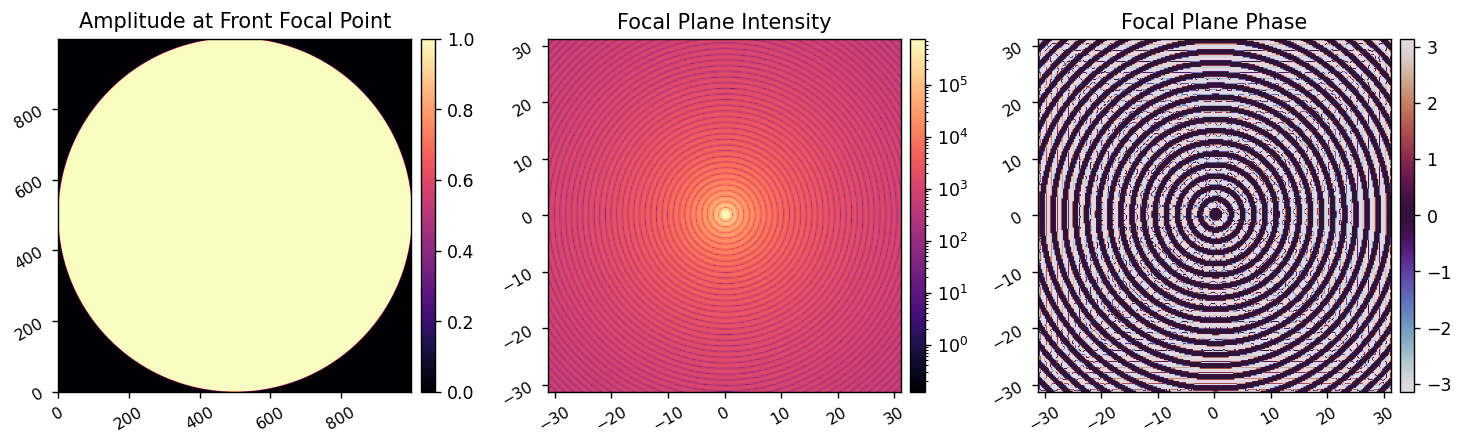

In [11]:
reload(ad_scoob)
m = ad_scoob.MODEL()

pupil = utils.pad_or_crop(m.APERTURE, 4096)
fpwf = scoobpsf.props.fft(pupil)
imshow3(pupil, xp.abs(fpwf), xp.angle(fpwf), 
        'Amplitude at Front Focal Point', 'Focal Plane Intensity', 'Focal Plane Phase', cmap3='twilight',
        npix1=1000, npix2=256, npix3=256, lognorm2=True, pxscl2=1/4.096, pxscl3=1/4.096, 
        )


Oversampling > 2x suggested for reliable results in Fresnel propagation.


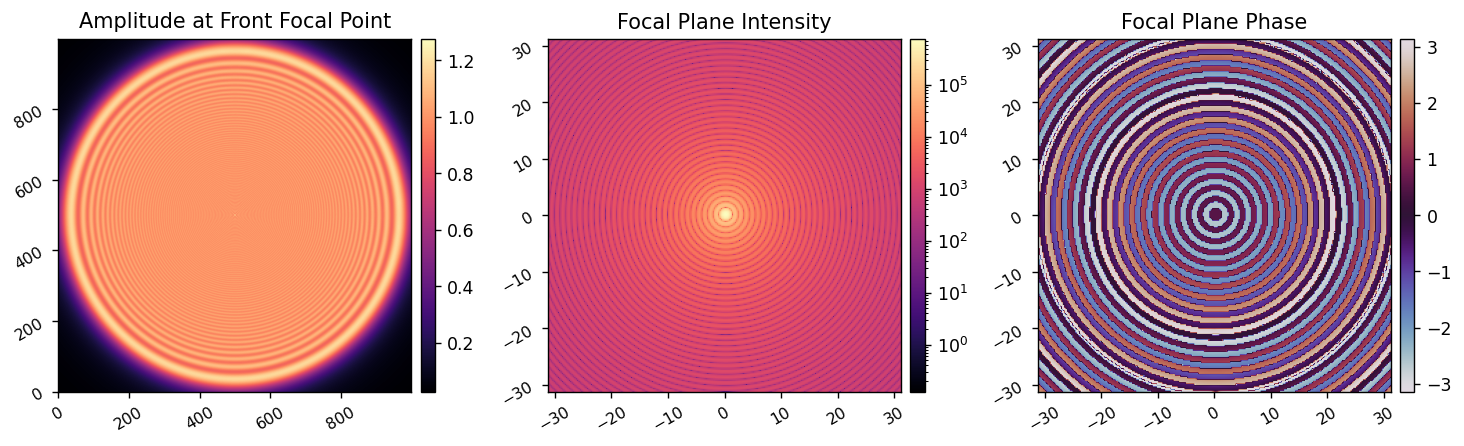

In [12]:
reload(ad_scoob)
m = ad_scoob.MODEL()

pupil = utils.pad_or_crop(m.APERTURE, 4096)
z = -240*u.mm
pixelscale = m.pupil_diam/(m.npix*u.pix)
wf = scoobpsf.props.ang_spec(pupil, m.wavelength, z, pixelscale)

fpwf = scoobpsf.props.fft(wf)
imshow3(xp.abs(wf), xp.abs(fpwf), xp.angle(fpwf), 
        'Amplitude at Front Focal Point', 'Focal Plane Intensity', 'Focal Plane Phase', 
        npix1=1000, npix2=256, npix3=256, lognorm2=True, pxscl2=1/4.096, pxscl3=1/4.096, cmap3='twilight',
        )
